In [25]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

In [6]:

data = pd.read_excel('/Users/saitejasriyerramsetti/Documents/Globalterror/globalterrorismdb_0522dist.xlsx')

In [7]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
data.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [9]:
data.shape

(209706, 135)

In [14]:
data['country_txt'].value_counts()

country_txt
Iraq                 27521
Afghanistan          18920
Pakistan             15504
India                13929
Colombia              8915
                     ...  
Andorra                  1
International            1
Falkland Islands         1
North Korea              1
Wallis and Futuna        1
Name: count, Length: 204, dtype: int64

In [15]:
data1 = pd.read_excel('/Users/saitejasriyerramsetti/Documents/Globalterror/globalterrorismdb_2021Jan-June_1222dist.xlsx')

In [16]:
combined_data = pd.concat([data, data1], ignore_index=True)
combined_data.shape

(214666, 135)

In [18]:
combined_data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Success Rate Analysis:

- Calculate overall success rate using the 'success' column.
- Group by 'attacktype1_txt' and calculate success rate for each attack type.
- Analyze success rates across different regions or countries.
- Investigate if certain weapons ('weaptype1_txt') are associated with higher success rates.

In [20]:
df = combined_data[['success', 'attacktype1_txt', 'region_txt', 'country_txt', 'weaptype1_txt', 'iyear', 'imonth', 'iday', 'gname', 'targtype1_txt', 'nperps', 
                    'multiple', 'suicide', 'property', 'nkill', 'nwound', 'vicinity', 
                    'crit1', 'crit2', 'crit3', 'extended']]

In [21]:
df.head(5)

,success,attacktype1_txt,region_txt,country_txt,weaptype1_txt,iyear,imonth,iday,gname,targtype1_txt,...,multiple,suicide,property,nkill,nwound,vicinity,crit1,crit2,crit3,extended
0,1,Assassination,Central America & Caribbean,Dominican Republic,Unknown,1970,7,2,MANO-D,Private Citizens & Property,...,0.0,0,0,1.0,0.0,0,1,1,1,0
1,1,Hostage Taking (Kidnapping),North America,Mexico,Unknown,1970,0,0,23rd of September Communist League,Government (Diplomatic),...,0.0,0,0,0.0,0.0,0,1,1,1,0
2,1,Assassination,Southeast Asia,Philippines,Unknown,1970,1,0,Unknown,Journalists & Media,...,0.0,0,0,1.0,0.0,0,1,1,1,0
3,1,Bombing/Explosion,Western Europe,Greece,Explosives,1970,1,0,Unknown,Government (Diplomatic),...,0.0,0,1,NaN,NaN,0,1,1,1,0
4,1,Facility/Infrastructure Attack,East Asia,Japan,Incendiary,1970,1,0,Unknown,Government (Diplomatic),...,0.0,0,1,NaN,NaN,0,1,1,1,0


In [22]:
df.shape

(214666, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214666 entries, 0 to 214665
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   success          214666 non-null  int64  
 1   attacktype1_txt  214666 non-null  object 
 2   region_txt       214666 non-null  object 
 3   country_txt      214666 non-null  object 
 4   weaptype1_txt    214666 non-null  object 
 5   iyear            214666 non-null  int64  
 6   imonth           214666 non-null  int64  
 7   iday             214666 non-null  int64  
 8   gname            214666 non-null  object 
 9   targtype1_txt    214666 non-null  object 
 10  nperps           143573 non-null  float64
 11  multiple         214663 non-null  float64
 12  suicide          214666 non-null  int64  
 13  property         214666 non-null  int64  
 14  nkill            201715 non-null  float64
 15  nwound           193961 non-null  float64
 16  vicinity         214666 non-null  int6

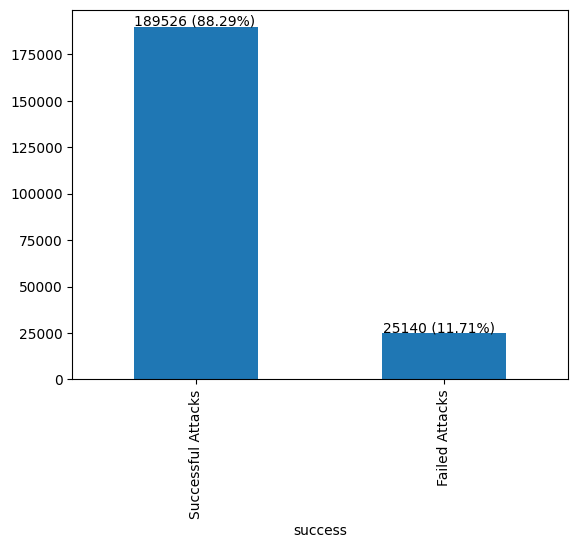

In [28]:
total = df['success'].count()
ax = df['success'].replace({1: 'Successful Attacks', 0: 'Failed Attacks'}).value_counts().plot(kind='bar')
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    ax.annotate(f'{p.get_height()} ({percentage})', (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [29]:
df['attacktype1_txt'].value_counts()

attacktype1_txt
Bombing/Explosion                      99986
Armed Assault                          50845
Assassination                          21989
Hostage Taking (Kidnapping)            14493
Facility/Infrastructure Attack         12606
Unknown                                11545
Unarmed Assault                         1257
Hostage Taking (Barricade Incident)     1172
Hijacking                                773
Name: count, dtype: int64

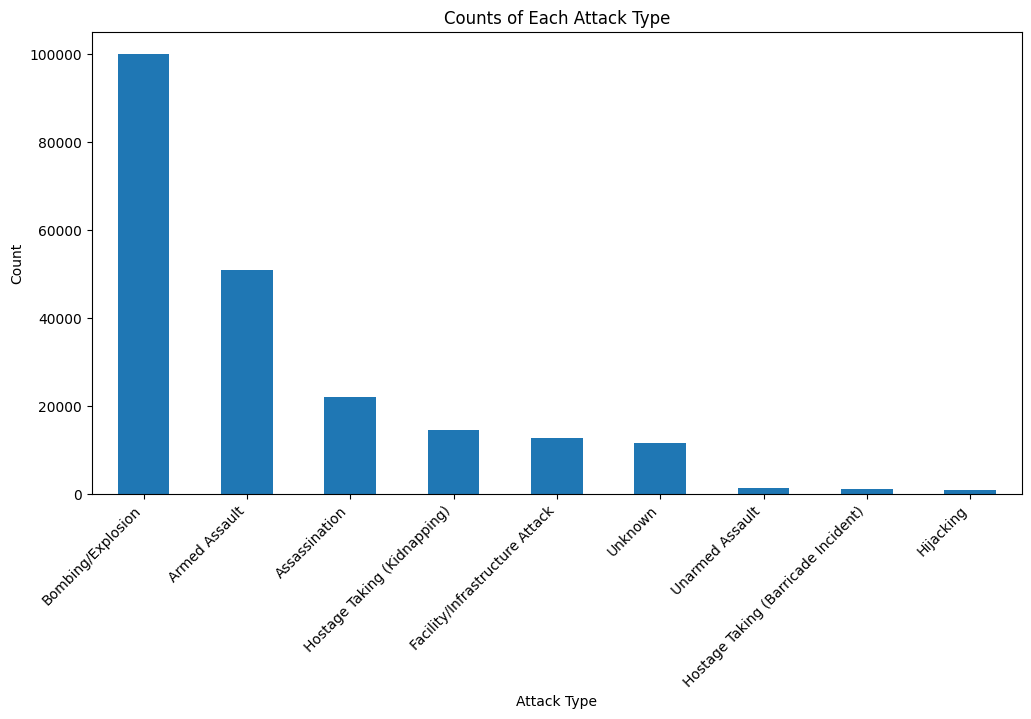

In [30]:
attack_counts = df['attacktype1_txt'].value_counts()
ax = attack_counts.plot(kind='bar', figsize=(12, 6), title='Counts of Each Attack Type')
ax.set_xlabel('Attack Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

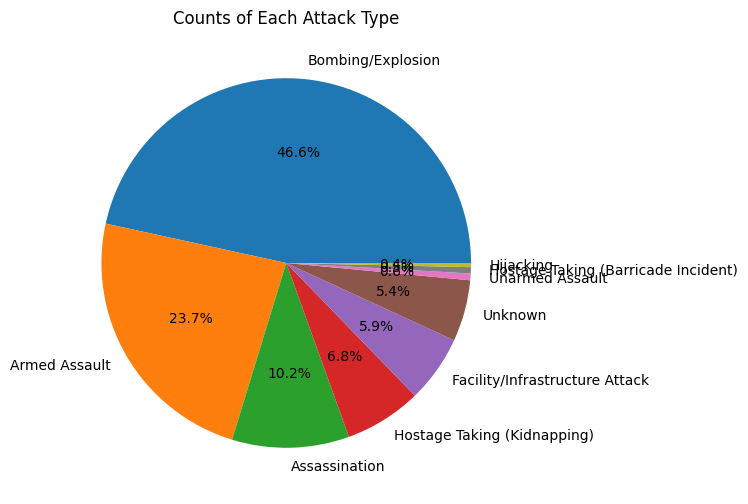

In [31]:
attack_counts = df['attacktype1_txt'].value_counts()
ax = attack_counts.plot(kind='pie', figsize=(12, 6), autopct='%1.1f%%', title='Counts of Each Attack Type')
ax.set_ylabel('')  # Remove the default y-label
plt.show()

In [32]:
df.to_csv('success_failure_data.csv', index=False)